# 9 - Markov Chain Monte Carlo

In [1]:
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import pandas as pd

import networkx as nx
# from causalgraphicalmodels import CausalGraphicalModel

import arviz as az
# ArviZ ships with style sheets!
# https://python.arviz.org/en/stable/examples/styles.html#example-styles
az.style.use("arviz-darkgrid")

import xarray as xr

import stan
import nest_asyncio

plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'lightgray'

# To DAG's
import daft
from causalgraphicalmodels import CausalGraphicalModel

In [2]:
# Add fonts to matplotlib to run xkcd

from matplotlib import font_manager

font_dirs = ["fonts/"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [3]:
# To make plots like drawing 
# plt.xkcd()

In [4]:
# To running the stan in jupyter notebook
nest_asyncio.apply()

### R Code 9.1

In [5]:
num_weeks = 10000

positions = np.zeros(num_weeks, dtype=int)

current = 10

for i in range(num_weeks):
    # Record current position
    positions[i] = current
    
    # F/lip coin to generate proposal
    proposal = current + np.random.choice([-1, 1], size=1)
    
    # Now make sure he loops around the archipelago
    if proposal < 1: 
        proposal = 10
    
    if proposal > 10:
        proposal = 1
    
    # Move?
    prob_move = proposal / current
    
    if np.random.uniform(0, 1) < prob_move:
        current = proposal
    else:
        current = current

### R Code 8.2

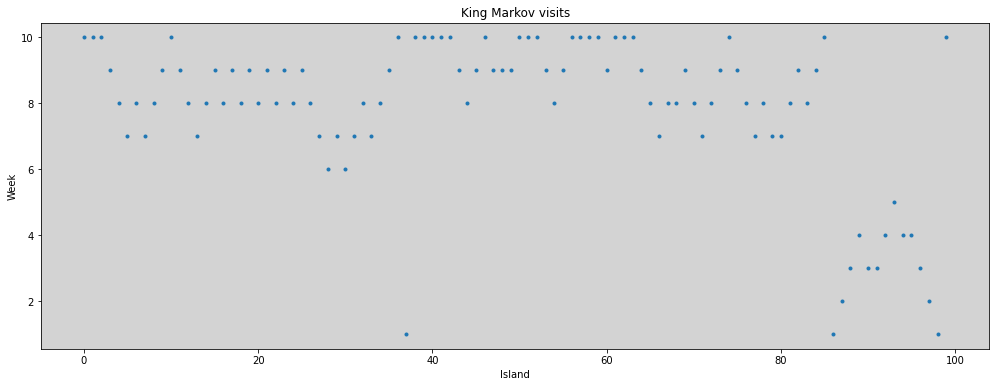

In [6]:
plt.figure(figsize=(17, 6))

plt.plot(np.arange(0, 100, dtype=int), positions[0:100], 'o', ms=3)
plt.title('King Markov visits')
plt.xlabel('Island')
plt.ylabel('Week')
plt.show()

### R Code 9.3

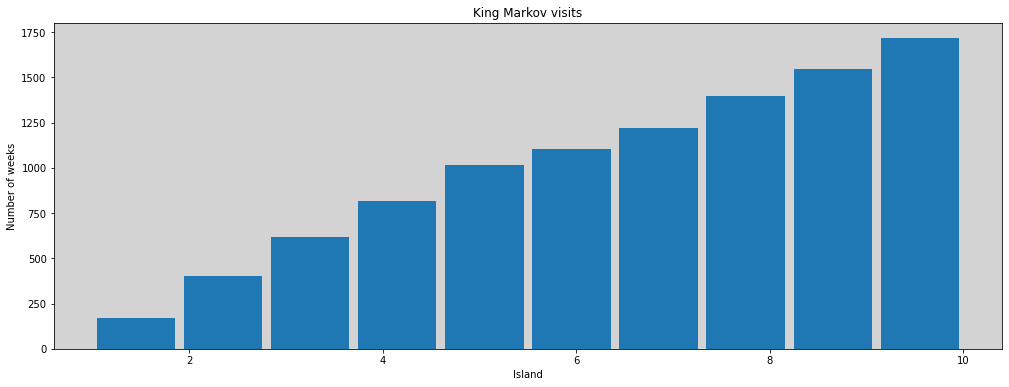

In [7]:
plt.figure(figsize=(17, 6))

plt.hist(positions, rwidth=0.9)
plt.title('King Markov visits')
plt.xlabel('Island')
plt.ylabel('Number of weeks')


plt.show()

### R Code 9.4

In [8]:
def multivariate_normal(D, T=1000):
    """ Return the Gaussian Multivariate standart D-dimensional 
    
    Parameter:
    ===========
    D: integer
        D is the dimension of the Gaussian Multivariate
        
    T: Integer; default=1000
        Qty samples
    """
    means = np.repeat(0, D) 
    diag = np.diag(np.repeat(1, D))
    return np.random.multivariate_normal(means, diag, T)


def rad_dist(Y):
    """ Return the distance radial from the mode
    
    Parameter:
    ===========
    Y: Multivariate Normal Starndart
    """
    return np.sqrt(np.sum(np.power(Y, 2)))


def get_radial_distances(D, T=1000):
    """ Return the array of distances of Gaussian Multivariate standart D-dimensional from mode 
    
    Parameter:
    ===========
    D: integer
        D is the dimension of the Gaussian Multivariate
        
    T: Integer; default=1000
        Qty samples
    """
    Y = multivariate_normal(D, T)
    return [rad_dist(Y[i]) for i in range(T)]

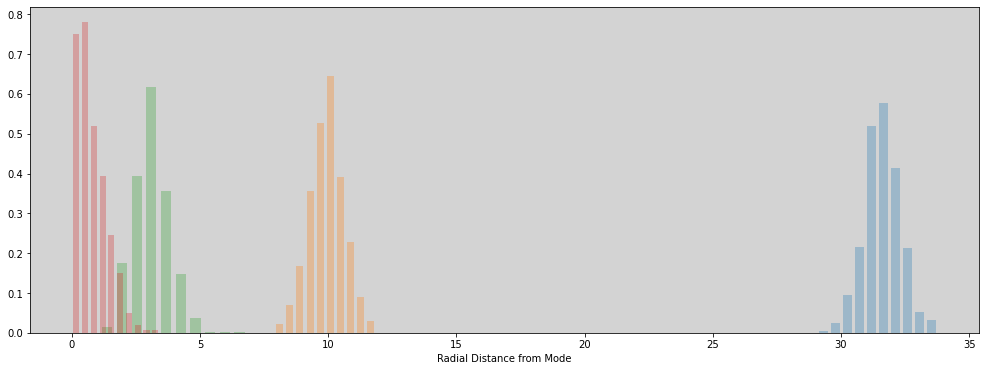

In [9]:
plt.figure(figsize=(17, 6))

plt.hist(get_radial_distances(1000), alpha=0.3, density=True, rwidth=0.7)
plt.hist(get_radial_distances(100), alpha=0.3, density=True, rwidth=0.7)
plt.hist(get_radial_distances(10), alpha=0.3, density=True, rwidth=0.7)
plt.hist(get_radial_distances(1), alpha=0.3, density=True, rwidth=0.7)

plt.xlabel('Radial Distance from Mode')

plt.show()

## Overthinking: Hamilton Monte Carlo in the raw

### R Code 9.5

### R Code 9.6

### R Code 9.7

### R Code 9.8

### R Code 9.9

### R Code 9.10

## 9.4 Easy HMC: **ulam**